<a href="https://colab.research.google.com/github/EnaPacheco/Datasets/blob/main/Evidencia%20final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Localizaciones de Puntos de Acceso Wi-Fi en la ciudad de Nueva York**
##### Este conjunto de datos es generado por la ciudad de Nueva York y en el siguiente link, se pueden descargar todos los datos: [NYC Wi-Fi Hotspot Locations Dataset](https://data.cityofnewyork.us/Social-Services/NYC-Wi-Fi-Hotspot-Locations/a9we-mtpn)
##### Básicamente, este conjunto de datos contiene información sobre las localizaciones de puntos de acceso Wi-Fi en toda la ciudad de Nueva York y también incluye detalles como el distrito, el proveedor y el tipo de conexión.
##### Una pequeña situación con la base de datos es que hay identificadores que no están del todo claros, tal como es el caso de la columna clasificada como "BIN". El significado de esta columna no es claro solo con la etiqueta, pero para investigar su significado se puede contactar a la organización que generó el conjunto de datos o simplemente se pueden analizar los datos dentro de la columna para reconocer un patrón.

### ***Descripción de las variables presentes en la base de datos***

*   **'TYPE' [Categórica]:** Tiene información sobre qué tipo de conexión a
internet es, por ejemplo, gratis o gratis limitada.
*   **'PROVIDER' [Categórica]:** Tiene información sobre qué provedor es el que hace que sea posible tener internet gratis en ciertas zonas.
*   **'CITY' [Categórica]:** Tiene información sobre qué puntos de la ciudad de Nueva York cuentan con internet gratis.
*   **'ACTIVATED' [DateTime]:** Tiene informaciçon sobre la fecha y hora en la que un acceso a Wi-Fi fue activado.
*   **'LAT' [Float]:** Tiene información sobre la latitud en donde se encuentra el acceso Wi-Fi.
*   **'LON' [Float]:** Tiene información sobre la longitud en donde se encuentra el acceso Wi-Fi.
*   **'LOCATION_T' [Categórica]:** Tiene información sobre si el acceso Wi-Fi se encuentra dentro o afuera de algún establecimiento.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from tabulate import tabulate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
path = 'https://raw.githubusercontent.com/tdm09/evidencias-entregas2039_101-EnaPacheco/main/NYC_Free_Public_WiFi_03292017.csv?token=GHSAT0AAAAAACOFO65YVGJSP66MON3XSTOYZPT65EQ'

In [ ]:
NYC_Wifi = pd.read_csv(path)
NYC_Wifi.head(201)

,BORO,the_geom,OBJECTID,TYPE,PROVIDER,NAME,LOCATION,LAT,LON,X,...,NTACODE,NTANAME,COUNDIST,POSTCODE,BOROCD,CT2010,BOROCT2010,BIN,BBL,DOITT_ID
0,BK,POINT (-73.87053740957452 40.68406083967918),10321,Free,LinkNYC - Citybridge,bk-05-145941,3386 FULTON STREET,40.684061,-73.870537,1.020156e+06,...,BK83,Cypress Hills-City Line,37,11208,305,184,3118400,3327234,3041480040,4726
1,BK,POINT (-73.86897452703059 40.68462509021575),10322,Free,LinkNYC - Citybridge,bk-05-145940,3435 FULTON STREET,40.684625,-73.868975,1.020589e+06,...,BK83,Cypress Hills-City Line,37,11208,305,184,3118400,3092471,3041340160,4727
2,BK,POINT (-73.86830878947508 40.68470155389536),10323,Free,LinkNYC - Citybridge,bk-05-145939,3450 FULTON STREET,40.684702,-73.868309,1.020774e+06,...,BK83,Cypress Hills-City Line,37,11208,305,184,3118400,3093023,3041510030,4728
3,BK,POINT (-73.86677732990765 40.68513094043811),10324,Free,LinkNYC - Citybridge,bk-05-145938,3480 FULTON STREET,40.685131,-73.866777,1.021198e+06,...,BK83,Cypress Hills-City Line,37,11208,305,184,3118400,3093078,3041520030,4729
4,BK,POINT (-73.89716745051707 40.67647466963193),10325,Free,LinkNYC - Citybridge,bk-05-145932,62 PENNSYLVANIA AVENUE,40.676475,-73.897167,1.012774e+06,...,BK82,East New York,37,11207,305,198,3119800,3083275,3036690030,4730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,QU,POINT (-73.78253999979735 40.676089999592264),10603,Limited Free,SPECTRUM,Baisley Pond Park,Park Perimeter,40.676090,-73.782540,1.044569e+06,...,QN02,Springfield Gardens North,28,11434,412,294,4029400,0,0,1407
197,QU,POINT (-73.78412000047007 40.674859999865),10604,Limited Free,SPECTRUM,Baisley Pond Park,Park Perimeter,40.674860,-73.784120,1.044132e+06,...,QN02,Springfield Gardens North,28,11434,412,294,4029400,0,0,1408
198,BK,POINT (-73.99430000055534 40.7014999998047),10605,Free,AT&T,Hillside Park,Near Vine St and Columbia Heights,40.701500,-73.994300,9.858305e+05,...,BK09,Brooklyn Heights-Cobble Hill,33,11201,302,1,3000100,0,3002050001,1409
199,QU,POINT (-73.78743999957887 40.675059999825635),10606,Limited Free,SPECTRUM,Baisley Pond Park,Park Perimeter,40.675060,-73.787440,1.043211e+06,...,QN76,Baisley Park,28,11434,412,288,4028800,0,0,1410


In [ ]:
NYC_Wifi.isnull().any().sum()

3

In [ ]:
variables = ['TYPE', 'PROVIDER', 'CITY', 'ACTIVATED', 'LOCATION_T']
new_NYC_Wifi = NYC_Wifi[variables]
new_NYC_Wifi.dropna(how = 'all',
           axis = 0,
           inplace = True
           )
new_NYC_Wifi

<ipython-input-455-4c08282e95cb>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,TYPE,PROVIDER,CITY,ACTIVATED,LOCATION_T
0,Free,LinkNYC - Citybridge,Brooklyn,11/21/2017 12:00:00 AM +0000,Outdoor Kiosk
1,Free,LinkNYC - Citybridge,Brooklyn,11/21/2017 12:00:00 AM +0000,Outdoor Kiosk
2,Free,LinkNYC - Citybridge,Brooklyn,11/21/2017 12:00:00 AM +0000,Outdoor Kiosk
3,Free,LinkNYC - Citybridge,Brooklyn,12/20/2017 12:00:00 AM +0000,Outdoor Kiosk
4,Free,LinkNYC - Citybridge,Brooklyn,02/06/2018 12:00:00 AM +0000,Outdoor Kiosk
...,...,...,...,...,...
3314,Free,LinkNYC - Citybridge,Brooklyn,01/20/2017 12:00:00 AM +0000,Outdoor Kiosk
3315,Free,LinkNYC - Citybridge,Brooklyn,01/08/2018 12:00:00 AM +0000,Outdoor Kiosk
3316,Free,LinkNYC - Citybridge,Brooklyn,02/01/2018 12:00:00 AM +0000,Outdoor Kiosk
3317,Free,LinkNYC - Citybridge,Brooklyn,01/05/2018 12:00:00 AM +0000,Outdoor Kiosk


In [ ]:
new_NYC_Wifi.isnull().any()

TYPE          False
PROVIDER      False
CITY          False
ACTIVATED     False
LOCATION_T    False
dtype: bool

##**1.   ¿Cuál es la distribución geográfica de los puntos de acceso Wi-Fi en cada distrito de la ciudad de Nueva York?**

In [ ]:
barriosNYC = NYC_Wifi['CITY'].unique()[:5]
datos_tabla = [[barrio] for barrio in barriosNYC]
table_str = tabulate(datos_tabla, headers=['Barrio'], tablefmt='grid')
print("Distritos más importantes presentes en la base de datos:")
print(table_str)

Distritos más importantes presentes en la base de datos:
+---------------+
| Barrio        |
+===============+
| Brooklyn      |
+---------------+
| New York      |
+---------------+
| Bronx         |
+---------------+
| Queens        |
+---------------+
| Staten Island |
+---------------+


Estos son las ciudades/distritos en los que hay puntos de acceso Wi-Fi.

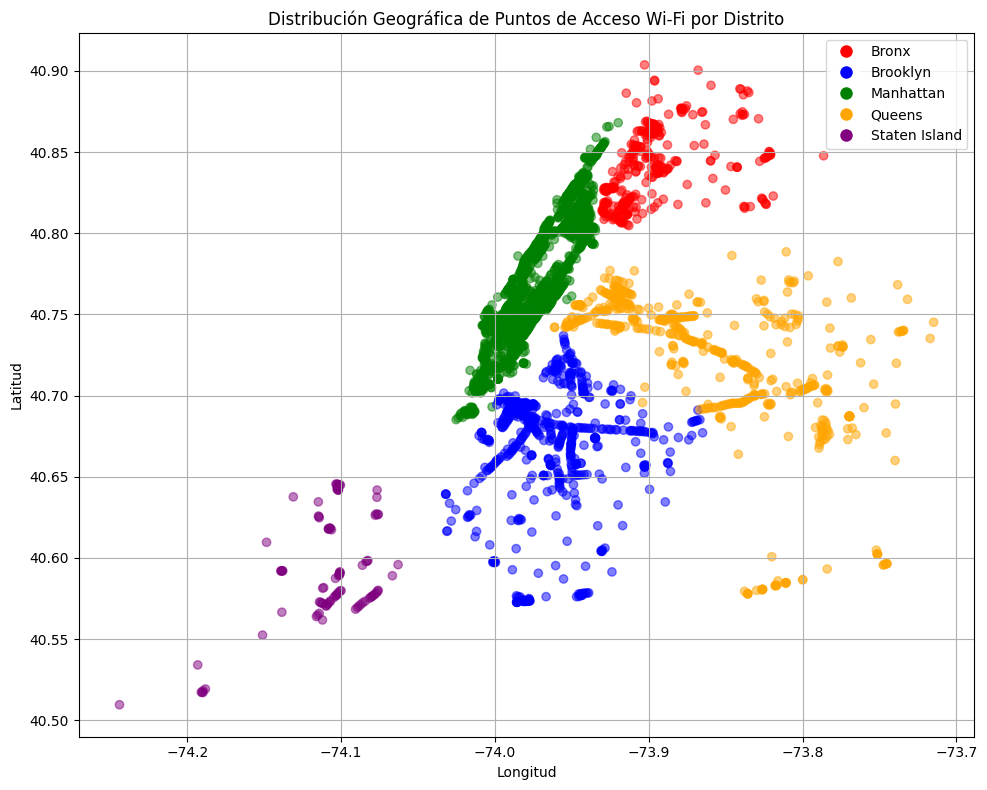

In [ ]:
distribucion_por_distrito = NYC_Wifi.groupby('BORONAME').size()
plt.figure(figsize=(10, 8))
plt.scatter(NYC_Wifi['LON'], NYC_Wifi['LAT'], c=NYC_Wifi['BORONAME'].map({'Bronx': 'red', 'Brooklyn': 'blue', 'Manhattan': 'green', 'Queens': 'orange', 'Staten Island': 'purple'}), alpha=0.5)
plt.title('Distribución Geográfica de Puntos de Acceso Wi-Fi por Distrito')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=distrito) for distrito, color in {'Bronx': 'red', 'Brooklyn': 'blue', 'Manhattan': 'green', 'Queens': 'orange', 'Staten Island': 'purple'}.items()])
plt.grid(True)
plt.tight_layout()
plt.show()

La distribución geográfica de los puntos de acceso Wi-Fi en los distritos más importantes de la ciudad de Nueva York se puede visualizar en el mapa generado. Cada punto en el mapa representa un punto de acceso Wi-Fi y los puntos están coloreados según el distrito al que pertenecen, gracias a sus coordenadas.

Esta representación geográfica permite identificar de manera sencilla la densidad y la distribución de los puntos de acceso Wi-Fi en toda la ciudad, así como las áreas con mayor y menor concentración de estos puntos en cada distrito, como por ejemplo, la abundancia de puntos de acceso en Nueva York, Brooklyn y Bronx.

##**2.   ¿Cuántos puntos de acceso a internet tiene cada distrito de la ciudad de Nueva York?**

In [ ]:
city_distribution = new_NYC_Wifi['CITY'].value_counts().to_frame().head()
city_distribution

,CITY
New York,1671
Brooklyn,702
Queens,465
Bronx,316
Staten Island,100


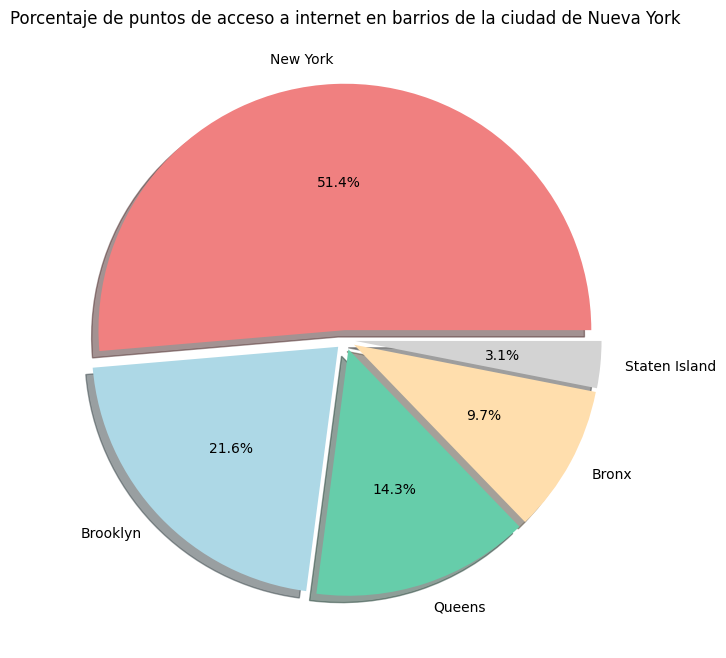

In [ ]:
plt.figure(figsize=(10, 8))
explode_size = [0.04, 0.04, 0.04, 0.04, 0.04]
colores = ['lightcoral', 'lightblue', 'mediumaquamarine', 'navajowhite', 'lightgrey']
city_distribution['CITY'].plot(kind='pie', autopct='%1.1f%%', shadow = True, explode = explode_size, colors = colores)
plt.title('Porcentaje de puntos de acceso a internet en barrios de la ciudad de Nueva York')
plt.ylabel('')
plt.show()

Como se puede ver, hay distritos que tienen muchos puntos de acceso a internet como principalmente Nueva York y Brooklyn, sin embargo, hay una gran cantidad de barrios que solamente cuentan con solo 1 o 2 puntos de acceso a internet como Elmhurst o Richmond Hill y por eso se decidió representar solo los 5 barrios más importantes. En este caso, en el gráfico de pastel Nueva York representa el 51.4% de los puntos de acceso a internet y en segundo lugar está Brooklyn con 21.6%, pues estos son los distritos con más puntos de acceso y su dominancia es notoria.

##**3. ¿Cuáles son los tipos de conexión de Wi-Fi más comunes en la ciudad?**

In [ ]:
common_connections = new_NYC_Wifi['TYPE'].value_counts().to_frame().head()
common_connections

,TYPE
Free,2736
Limited Free,581
Partner Site,2


In [ ]:
most_connection = new_NYC_Wifi['TYPE'].value_counts().idxmax()
most_connection_data = new_NYC_Wifi[new_NYC_Wifi['TYPE'] == most_connection]
most_connection_per_district = most_connection_data['CITY'].value_counts().head()
print("Tipo de conexión más común:", most_connection)
print("\nVeces que está presente en los distritos este tipo de conexión:")
print(tabulate(most_connection_per_district.to_frame(), headers=['Distrito', 'Frecuencia'], tablefmt='grid'))

Tipo de conexión más común: Free

Veces que está presente en los distritos este tipo de conexión:
+---------------+--------------+
| Distrito      |   Frecuencia |
+===============+==============+
| New York      |         1572 |
+---------------+--------------+
| Brooklyn      |          542 |
+---------------+--------------+
| Queens        |          313 |
+---------------+--------------+
| Bronx         |          196 |
+---------------+--------------+
| Staten Island |           48 |
+---------------+--------------+


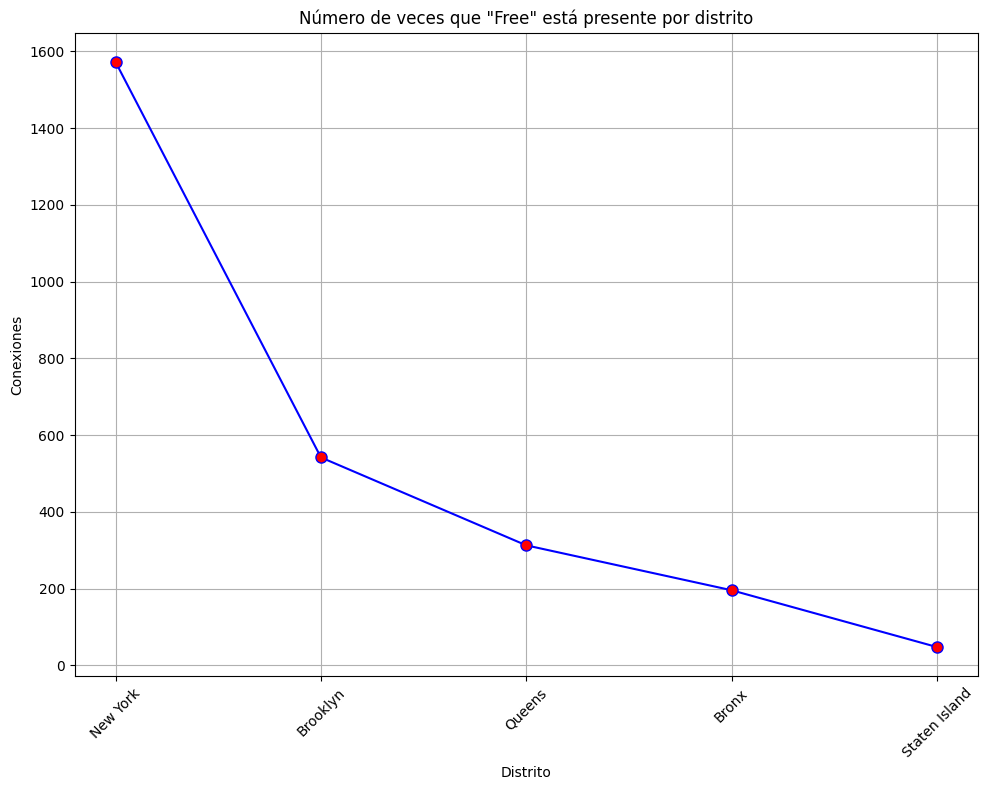

In [ ]:
plt.figure(figsize=(10, 8))
distritos = most_connection_per_district.index.tolist()
recuentos = most_connection_per_district.values.tolist()
color_linea = 'b'
color_puntos = 'r'  # Color de los puntos
plt.plot(distritos, recuentos, marker='o', linestyle='-', color=color_linea, markersize=8, markerfacecolor=color_puntos)  # Cambiar el tamaño y el color de los puntos
plt.title('Número de veces que "Free" está presente por distrito')
plt.xlabel('Distrito')
plt.ylabel('Conexiones')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

De acuerdo a los datos presentados, el tipo de conexión más común es "Free" y está más presente en la ciudad de Nueva York, con 1,572 conexiones, después Brooklyn con 542 y siguen las demás, que aún así, tienen una diferencia significativa con respecto a Nueva York. Básicamente, se repiten los distritos con mayores puntos de acceso y es normal, ya que si son los que tienen más puntos de acceso a internet, tienen que ser los que más tengan a cierto provedor o cierto tipo de conexión.

##**4.   ¿Qué proveedor tiene el mayor número de puntos de acceso a internet y en qué distritos se concentran?**

In [ ]:
provider_distribution = new_NYC_Wifi['PROVIDER'].value_counts().to_frame().head()
provider_distribution

,PROVIDER
LinkNYC - Citybridge,1868
SPECTRUM,343
Transit Wireless,276
ALTICEUSA,237
Harlem,101


In [ ]:
data = {'Distrito': top_districts.index, 'Cantidad de Puntos de Acceso': top_districts.values}
df = pd.DataFrame(data)
print("Proveedor con mayor número de puntos de acceso:")
print(max_provider)
print("\nDistritos con mayor punto de acceso de este proveedor:")
print(tabulate(df, headers='keys', tablefmt='grid', showindex=False))

Proveedor con mayor número de puntos de acceso:
LinkNYC - Citybridge

Distritos con mayor punto de acceso de este proveedor:
+---------------+--------------------------------+
| Distrito      |   Cantidad de Puntos de Acceso |
+===============+================================+
| New York      |                           1175 |
+---------------+--------------------------------+
| Queens        |                            265 |
+---------------+--------------------------------+
| Brooklyn      |                            257 |
+---------------+--------------------------------+
| Bronx         |                            137 |
+---------------+--------------------------------+
| Staten Island |                             34 |
+---------------+--------------------------------+


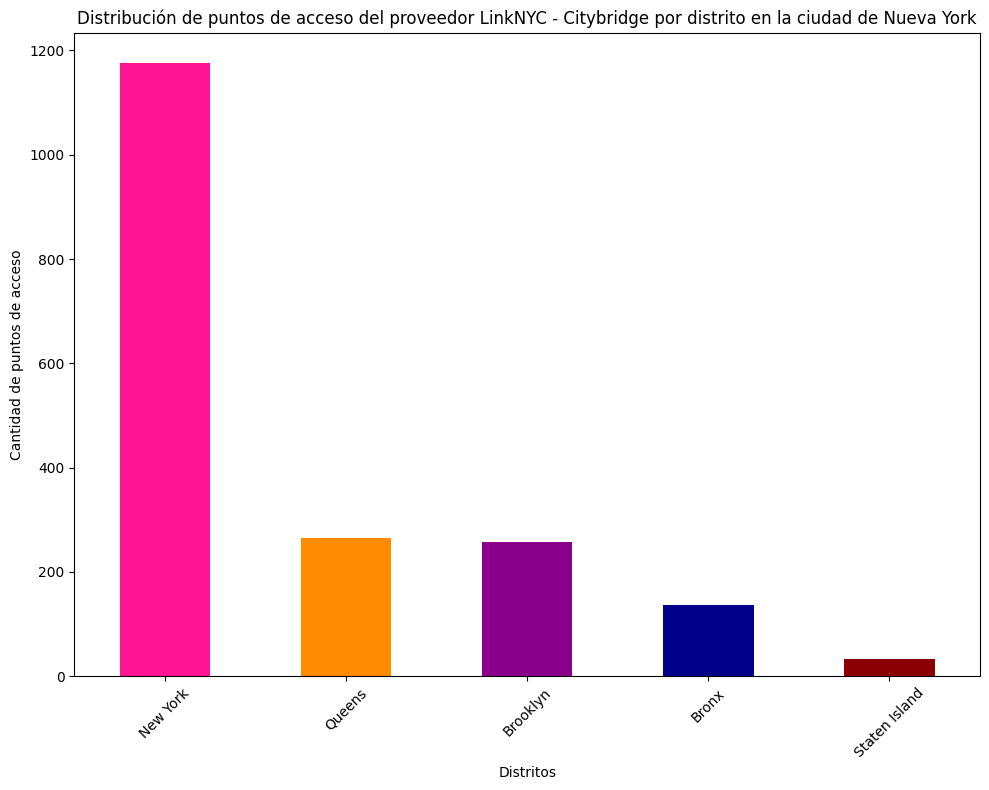

In [ ]:
plt.figure(figsize=(10, 8))
colores2 = ['deeppink', 'darkorange', 'darkmagenta', 'darkblue', 'darkred']
top_districts.plot(kind='bar', color=colores2)
plt.title(f'Distribución de puntos de acceso del proveedor {max_provider} por distrito en la ciudad de Nueva York')
plt.xlabel('Distritos')
plt.ylabel('Cantidad de puntos de acceso')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Como se puede observar, LinkNYC - Citybridge es el provedor que más puntos de acceso tiene y en segundo lugar está SPECTRUM. En el distrito en el que más se concentra LinkNYC - Citybridge es en Nueva York con 1,175 puntos de acceso y después está Queens con 265.

Hace sentido que Nueva York es el que tenga más puntos de acceso de esta compañía porque es el que más puntos de acceso tiene y el gráfico de barras corrobora esta información, ya que los otros barrios no muestran nada porque el provedor LinkNYC - Citybridge no tiene cobertura en esos lugares, sin embargo, se ve cómo Nueva York al ser el distrito que más veces cuenta con el servicio de este provedor, tiene una barra mucho más sobresaliente.

##**5.   ¿Cuál es la distribución temporal de la activación de puntos de acceso Wi-Fi en la ciudad de Nueva York?**

In [ ]:
datos_tabla = top_fechas[['Año', 'Mes', 'Día', 'Activaciones']].values.tolist()
table_str = tabulate(datos_tabla, headers=['Año', 'Mes', 'Día', 'Activaciones'], tablefmt='grid')
print("Fechas más relevantes de activaciones de puntos de acceso Wi-Fi en NYC (2016-2019):")
print(table_str)

Fechas más relevantes de activaciones de puntos de acceso Wi-Fi en NYC (2016-2019):
+-------+-------+-------+----------------+
|   Año |   Mes |   Día |   Activaciones |
+=======+=======+=======+================+
|  2016 |     7 |    19 |             23 |
+-------+-------+-------+----------------+
|  2016 |     7 |    21 |             19 |
+-------+-------+-------+----------------+
|  2016 |     3 |    30 |             12 |
+-------+-------+-------+----------------+
|  2016 |     4 |     7 |             12 |
+-------+-------+-------+----------------+
|  2016 |     4 |    15 |             11 |
+-------+-------+-------+----------------+
|  2017 |     2 |    28 |             13 |
+-------+-------+-------+----------------+
|  2017 |     7 |    20 |             13 |
+-------+-------+-------+----------------+
|  2017 |    10 |     6 |             13 |
+-------+-------+-------+----------------+
|  2017 |     4 |    14 |             12 |
+-------+-------+-------+----------------+
|  2017 |    

In [ ]:
NYC_Wifi = NYC_Wifi[NYC_Wifi['ACTIVATED'] != '9999-09-09']
NYC_Wifi = NYC_Wifi[NYC_Wifi['ACTIVATED'] != '0000-00-00']
NYC_Wifi['ACTIVATED'] = NYC_Wifi['ACTIVATED'].apply(lambda x: pd.to_datetime(x, errors='coerce'))
NYC_Wifi = NYC_Wifi.dropna(subset=['ACTIVATED'])

In [ ]:
NYC_Wifi['Año'] = NYC_Wifi['ACTIVATED'].dt.year
NYC_Wifi['Mes'] = NYC_Wifi['ACTIVATED'].dt.month
NYC_Wifi['Día'] = NYC_Wifi['ACTIVATED'].dt.day
NYC_Wifi_years = NYC_Wifi[NYC_Wifi['Año'].isin([2016, 2017, 2018, 2019])]
activaciones_por_fecha = NYC_Wifi_years.groupby(['Año', 'Mes', 'Día']).size().reset_index(name='Activaciones')
top_fechas = activaciones_por_fecha.groupby('Año').apply(lambda x: x.nlargest(5, 'Activaciones')).reset_index(drop=True)
fig = px.sunburst(top_fechas, path=['Año', 'Mes', 'Día'], values='Activaciones')
fig.update_layout(title='Distribución temporal de las fechas más relevantes de activaciones de puntos de acceso Wi-Fi en NYC (2016-2019)')
fig.show()

<ipython-input-469-9265d1b8a300>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-469-9265d1b8a300>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-469-9265d1b8a300>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Este es un resumen de las fechas más relevantes de activaciones de puntos de acceso Wi-Fi en la ciudad de Nueva York durante los años 2016 a 2019. Cada fila representa una fecha en la que se produjeron activaciones significativas, junto con el número de activaciones registradas en esa fecha.

Por ejemplo, en el año 2016, el 19 de julio se registraron 23 activaciones, el 21 de julio se registraron 19, y así sucesivamente. De hecho, el año 2016 fue el año en el que más activaciones hubo.

Esto proporciona una visión general de las fechas en las que se produjeron las activaciones más importantes y probablemente la influencia de ciertos periodos para instalar internet callejero.

##**6.   ¿Cómo varía la cantidad de activaciones de puntos de acceso Wi-Fi en diferentes días de la semana?**

In [ ]:
activaciones_por_dia_df = activaciones_por_dia.reset_index()
activaciones_por_dia_df.columns = ['Día de la Semana', 'Número de Activaciones']
print(tabulate(activaciones_por_dia_df, headers='keys', tablefmt='grid', showindex=False))

+--------------------+--------------------------+
| Día de la Semana   |   Número de Activaciones |
+====================+==========================+
| Friday             |                      374 |
+--------------------+--------------------------+
| Monday             |                      279 |
+--------------------+--------------------------+
| Saturday           |                        1 |
+--------------------+--------------------------+
| Sunday             |                        3 |
+--------------------+--------------------------+
| Thursday           |                      380 |
+--------------------+--------------------------+
| Tuesday            |                      341 |
+--------------------+--------------------------+
| Wednesday          |                      444 |
+--------------------+--------------------------+


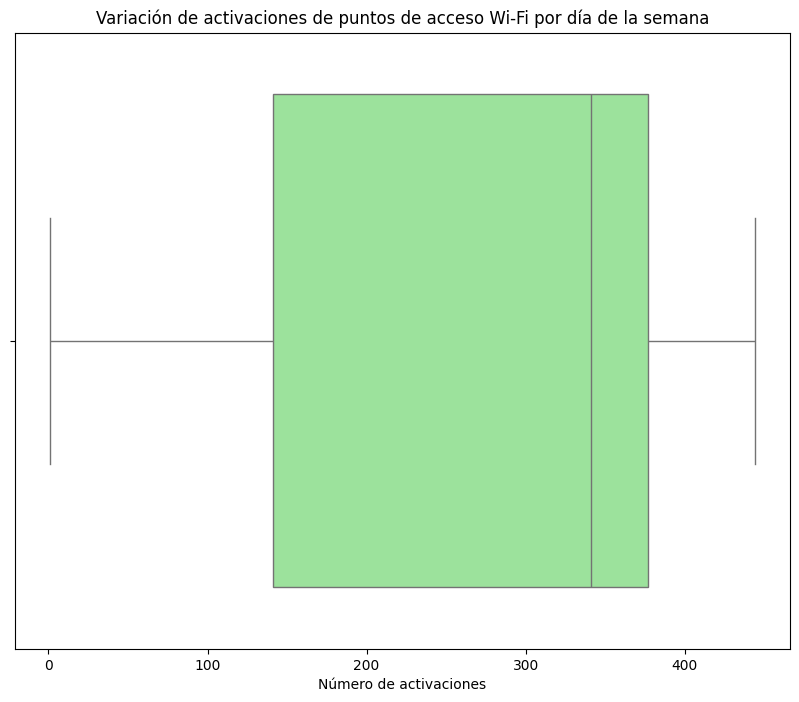

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=activaciones_por_dia_df, x='Número de Activaciones', color='lightgreen')
plt.title('Variación de activaciones de puntos de acceso Wi-Fi por día de la semana')
plt.xlabel('Número de activaciones')
plt.show()

- En este caso, la mediana se encuentra aproximadamente en 343, entonces es el promedio de activaciones de Wi-Fi por día de la semana.

- La longitud de la caja indica la variabilidad de los datos y como se puede observar, el rango intercuartílico va aproximadamente desde 279 hasta 380 activaciones. Los bigotes indican la extensión de los datos.

Algo que hay que destacar es que no hay valores atípicos más allá de los bigotes en este conjunto de datos, lo que significa que no hay días con un número excepcionalmente alto o bajo de activaciones en comparación con el resto de los días y tampoco hay puntos individuales fuera de los bigotes, lo que confirma la ausencia de valores atípicos en los datos.


##**7.   ¿Cuál es la distribución de la cantidad de activaciones de puntos de acceso Wi-Fi en diferentes meses del año?**

In [ ]:
meses_activaciones = NYC_Wifi['Mes'].value_counts().reset_index()
meses_activaciones.columns = ['Mes', 'Número de Activaciones']
meses_activaciones = meses_activaciones.sort_values(by='Mes')
print(tabulate(meses_activaciones, headers='keys', tablefmt='grid', showindex=False))

+-------+--------------------------+
|   Mes |   Número de Activaciones |
+=======+==========================+
|     1 |                      139 |
+-------+--------------------------+
|     2 |                      187 |
+-------+--------------------------+
|     3 |                      193 |
+-------+--------------------------+
|     4 |                      227 |
+-------+--------------------------+
|     5 |                      199 |
+-------+--------------------------+
|     6 |                      167 |
+-------+--------------------------+
|     7 |                      201 |
+-------+--------------------------+
|     8 |                      116 |
+-------+--------------------------+
|     9 |                      100 |
+-------+--------------------------+
|    10 |                      125 |
+-------+--------------------------+
|    11 |                       85 |
+-------+--------------------------+
|    12 |                       83 |
+-------+--------------------------+


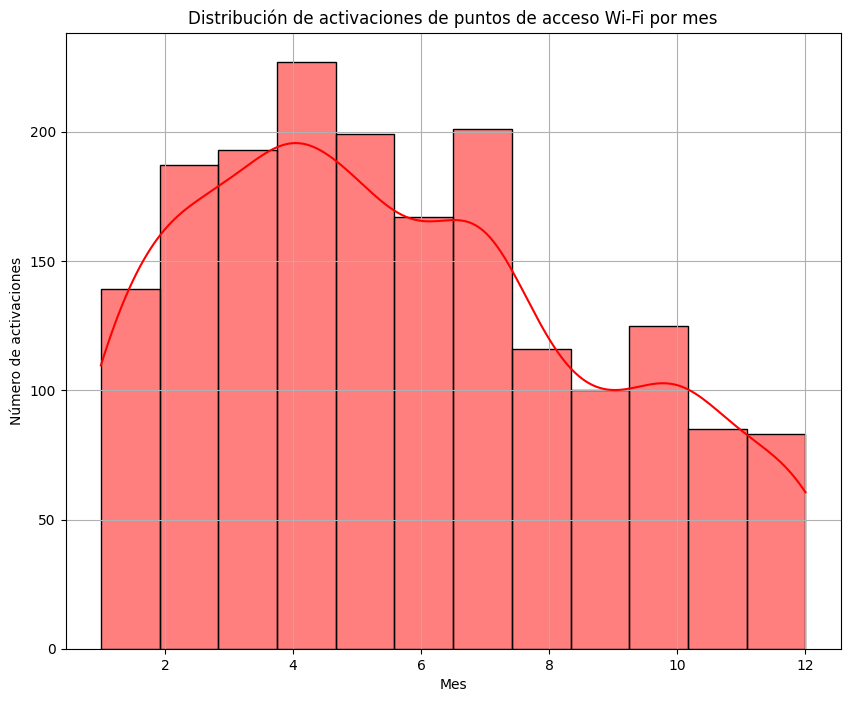

In [ ]:
NYC_Wifi['Mes'] = NYC_Wifi['ACTIVATED'].dt.month
plt.figure(figsize=(10, 8))
sns.histplot(NYC_Wifi['Mes'], bins=12, color='red', kde=True)
plt.title('Distribución de activaciones de puntos de acceso Wi-Fi por mes')
plt.xlabel('Mes')
plt.ylabel('Número de activaciones')
plt.grid(True)
plt.show()


Cada barra representa un mes del año, y la altura de la barra indica la cantidad de activaciones registradas para ese mes.

Se observa que los meses con mayor número de activaciones son abril (con 227 activaciones), julio (con 201 activaciones) y febrero (con 187 activaciones). Por otro lado, los meses con menor número de activaciones son noviembre (con 85 activaciones) y diciembre (con 83 activaciones).

Una observación importante es que la línea de ajuste no muestra una distribución normal porque no muestra la forma de una curva de campana.

In [ ]:
X = pd.get_dummies(NYC_Wifi[['LAT', 'LON', 'POSTCODE']], drop_first=True)
y = NYC_Wifi['PROVIDER']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las clases en y_train y y_test
print("Clases en y_train:", y_train.unique())
print("Clases en y_test:", y_test.unique())

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Realizar predicciones sobre los datos de prueba
y_pred = model.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Mostrar un informe de clasificación
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))

Clases en y_train: ['LinkNYC - Citybridge' 'Spot On Networks']
Clases en y_test: ['LinkNYC - Citybridge' 'Spot On Networks']
Precisión del modelo: 0.9863013698630136

Informe de clasificación:
                      precision    recall  f1-score   support

LinkNYC - Citybridge       0.99      1.00      0.99       360
    Spot On Networks       0.00      0.00      0.00         5

            accuracy                           0.99       365
           macro avg       0.49      0.50      0.50       365
        weighted avg       0.97      0.99      0.98       365



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Este es el resultado de un modelo de regresión logística que intenta predecir entre las clases 'LinkNYC - Citybridge' y 'Spot On Networks'.

La precisión del modelo es del 98.63%, lo que indica que el 98.63% de las predicciones realizadas por el modelo son correctas, por lo que se consideraría un modelo confiable.

Para la clase 'LinkNYC - Citybridge', la precisión, recall y f1-score son altos, lo que indica que el modelo es muy bueno para predecir esta clase, pero para la clase 'Spot On Networks', la precisión es del 0%, lo que significa que el modelo no fue capaz de predecir correctamente ninguna instancia de esta clase; esto también se refleja en el f1-score y el recall, porque de igual manera son 0 para esta clase.

En resumen, el modelo es muy preciso para predecir la clase 'LinkNYC - Citybridge', pero es deficiente en la predicción de la clase 'Spot On Networks', ya que no fue capaz de predecir correctamente ninguna instancia de esta clase. Esto se puede deber a un desequilibrio en los datos o a que se necesita un ajuste en el modelo.

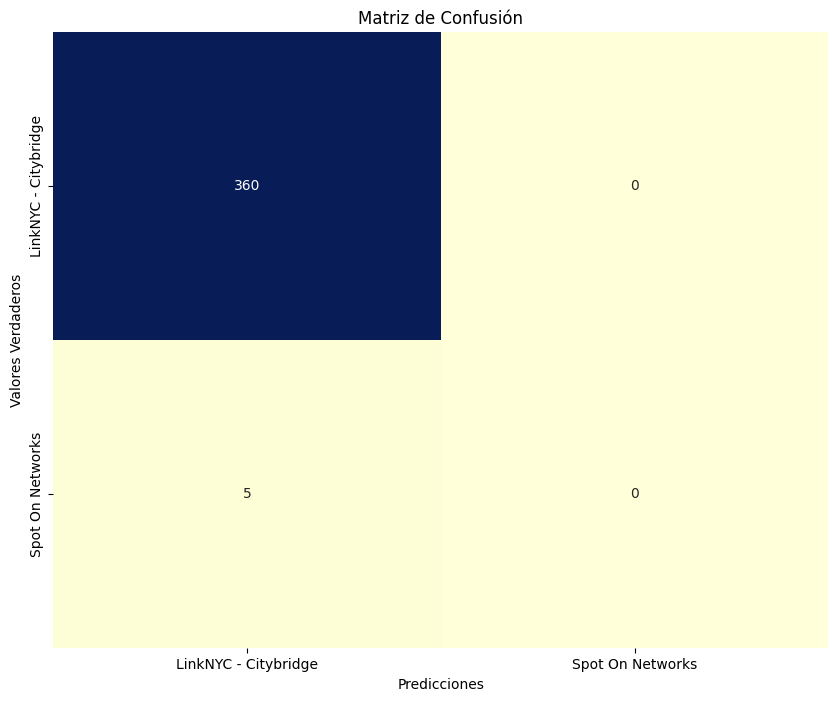

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Crear un DataFrame para visualizar la matriz de confusión
conf_df = pd.DataFrame(conf_matrix, index=model.classes_, columns=model.classes_)

# Graficar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_df, annot=True, cmap="YlGnBu", fmt="d", cbar=False)
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Verdaderos")
plt.show()


**LinkNYC - Citybridge:** En la primera fila de la matriz, se puede ver que para la clase 'LinkNYC - Citybridge', el modelo predijo correctamente 360 instancias como 'LinkNYC - Citybridge' (verdaderos positivos). Por otra parte, no predijo correctamente ninguna instancia de 'Spot On Networks' como 'LinkNYC - Citybridge' (falsos negativos), ya que el número en la misma fila pero en la columna correspondiente a 'Spot On Networks' es 0.

**Spot On Networks:** En la segunda fila de la matriz, se observa que para la clase 'Spot On Networks', el modelo no predijo correctamente ninguna instancia como 'Spot On Networks' (verdaderos negativos), ya que el número en la misma fila pero en la columna correspondiente a 'Spot On Networks' es 0.
Tampoco predijo correctamente ninguna instancia de 'LinkNYC - Citybridge' como 'Spot On Networks' (falsos positivos), ya que el número en la misma fila pero en la columna correspondiente a 'LinkNYC - Citybridge' es 0.

## **Hallazgos interesantes:**

*   **Distribución desigual de puntos de acceso:** Se halló que algunos distritos, como Nueva York y Brooklyn, tienen una gran cantidad de puntos de acceso a internet, mientras que otros, como Elmhurst o Richmond Hill, cuentan con muy pocos, e incluso solo 1 o 2.
*   **Dominancia de Nueva York y Brooklyn:** En un gráfico de pastel, se descubrió que Nueva York representa el 51.4% de todos los puntos de acceso, seguido de cerca por Brooklyn con un 21.6%. Este hallazgo resalta la importancia de estos distritos en términos de conectividad Wi-Fi en la ciudad.
*   **Proveedores principales:** LinkNYC - Citybridge es el proveedor líder en términos de cantidad de puntos de acceso, con una concentración notable en Nueva York, donde cuenta con 1175 puntos de acceso. Esto tiene sentido dado que Nueva York es el distrito con más puntos de acceso en general.
*   **Conexión "Free" predominante:** El tipo de conexión más común es "Free", y está más presente en la ciudad de Nueva York, con 1572 conexiones. Este hallazgo sugiere una amplia disponibilidad de conexión Wi-Fi gratuita en la ciudad.
*   **Año y mes con mayor activación de Wi-Fi:** 2016 fue el año con el mayor número de activaciones de Wi-Fi (con 77 activaciones) y fue durante julio en donde hubo más activaciones; se cree que fue por la temporada de verano.

## **¿Stakeholders?**
Podrían haber muchos interesados en conocer más sobre estas preguntas, por ejemplo, los organismos gubernamentales locales responsables del desarrollo urbano y la planificación de infraestructuras digitales o las compañías de telecomunicaciones que buscan expandir estratégicamente su cobertura de red.

## **Conclusiones**
*   Se observa que los distritos más importantes en la base de datos son New York, Brooklyn, Queens, Bronx y Staten Island, con una distribución de puntos de acceso WiFi más significativa en la ciudad de Nueva York.
*   La mayoría de los puntos de acceso son del tipo Free, seguidos por Limited Free y Partner Site. Esto indica que la mayoría de los puntos de acceso proporcionan acceso gratuito a internet.
*   El proveedor de WiFi más común es "LinkNYC - Citybridge", seguido por "SPECTRUM" y "Transit Wireless".
*   Las fechas más relevantes de activaciones de puntos de acceso WiFi se concentran principalmente en los años 2016 y 2017 y disminuyen en 2019.
*   En cuanto a la precisión del modelo de clasificación, se observa que el modelo tiene una alta precisión general del 98.63%, pero al examinar el informe de clasificación, se observa que el modelo no predice correctamente la clase "Spot On Networks", con una precisión y recall del 0%. Esto quiere decir que el modelo no es efectivo para predecir esta clase.

En resumen, la información sugiere una alta disponibilidad de puntos de acceso WiFi en la ciudad de Nueva York, con una dominancia de proveedores y tipos de conexión específicos. Solamente el único detalle es que el modelo de clasificación no es completamente confiable para predecir ciertas clases, lo que indica la necesidad de una evaluación más detallada o mejoras en el modelo.